<a href="https://colab.research.google.com/github/AmeyaKI/multimodal-asr/blob/main/explore_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install -y libsndfile1 ffmpeg
!pip install torchcodec

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,225 kB]
Get:5 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd

In [2]:
!pip install datasets librosa soundfile torch

In [3]:
from datasets import load_dataset
from IPython.display import Audio as ipyAudio
import torchcodec, torchaudio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# actual data
file_path = 'clean/test-00001-of-00009.parquet'
dataset = load_dataset("MLCommons/peoples_speech", data_files=file_path) # downloading one specific file

README.md: 0.00B [00:00, ?B/s]

clean/test-00001-of-00009.parquet:   0%|          | 0.00/376M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [11]:
sample = next(iter(dataset['train'])) # first row of dataset
audio = sample['audio']['array']
sample_rate = sample['audio']['sampling_rate']
real_text = sample['text']

Text(0, 0.5, 'Amplitude')

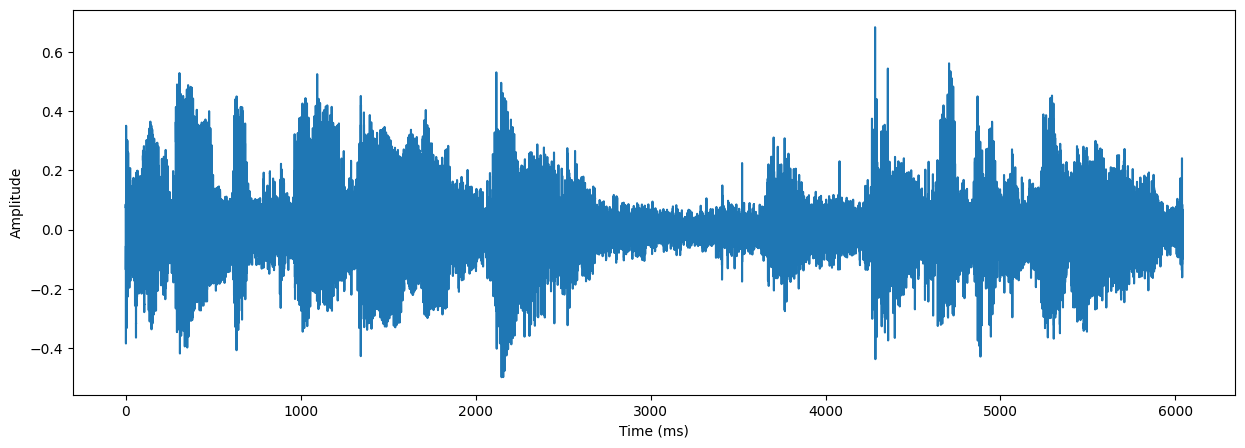

In [13]:
time_ms = np.arange(len(audio)) * (1000 / sample_rate)

plt.figure(figsize=(15,5))
plt.plot(time_ms, audio)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

In [14]:
audio_file = ipyAudio(audio, rate=sample_rate)
audio_file

In [17]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import os
save_file_path = '/content/drive/MyDrive/Colab Notebooks/data/asr'
os.listdir(save_file_path)
with open(f'{save_file_path}/output_audio.wav', 'wb') as f:
    f.write(audio_file.data)

In [22]:
os.listdir(save_file_path)

['sample.wav', 'output_audio.wav']